# Audio Feature Extraction

In [1]:
! pip install noisereduce

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

import os
from scipy.io import wavfile
from scipy.io import wavfile as wav
import noisereduce as nr
import soundfile as sf


In [3]:
df = pd.read_csv('full_id.csv')

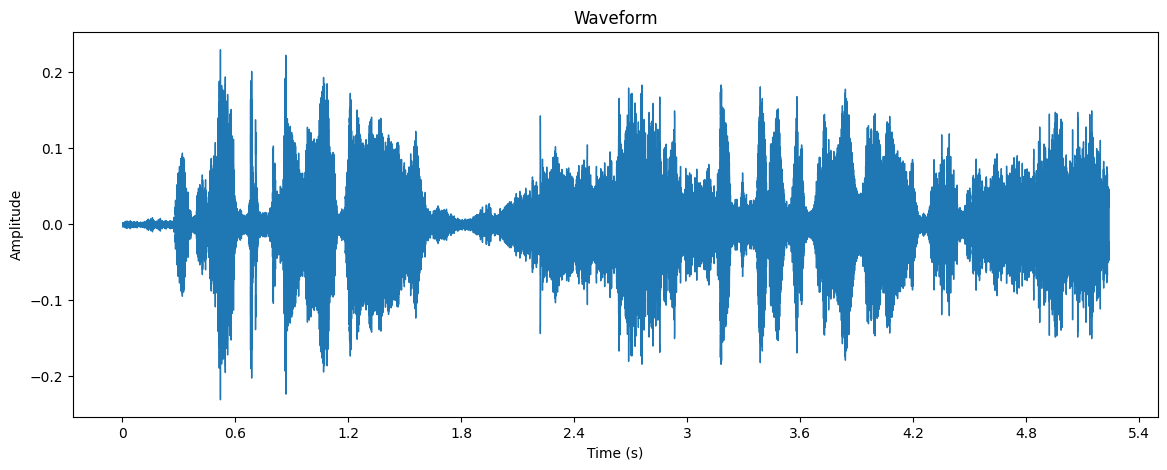

In [4]:
# Sample sound file path
sample_file = 'original_audio_data/1.wav'

# Load audio file
sample_data, sample_sample_rate = librosa.load(sample_file)

# Plot the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(sample_data, sr=sample_sample_rate)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Play the audio
ipd.Audio(sample_file)

In [5]:
wav_folder = 'original_audio_data'

# Lists to store filenames by channel type
mono_files = []
stereo_files = []
multi_channel_files = []

# Check each .wav file in the directory
for file in os.listdir(wav_folder):
    if file.endswith('.wav'):
        file_path = os.path.join(wav_folder, file)
        
        try:
            sample_rate, audio_data = wavfile.read(file_path)
            
            # Check if mono (1 channel)
            if audio_data.ndim == 1 or (audio_data.ndim == 2 and audio_data.shape[1] == 1):
                mono_files.append(file)
            
            # Check if stereo (2 channels)
            elif audio_data.ndim == 2 and audio_data.shape[1] == 2:
                stereo_files.append(file)
            
            # Check if multi-channel (3 or more channels)
            elif audio_data.ndim == 2 and audio_data.shape[1] >= 3:
                multi_channel_files.append(file)
                
        except Exception as e:
            print(f"Error reading {file}: {e}")

# Print the counts and store file lists
print("\nSummary:")
print(f"Mono files (1 channel): {len(mono_files)}")
print(f"Stereo files (2 channels): {len(stereo_files)}")
print(f"Multi-channel files (3 or more channels): {len(multi_channel_files)}")


Summary:
Mono files (1 channel): 179
Stereo files (2 channels): 250
Multi-channel files (3 or more channels): 0


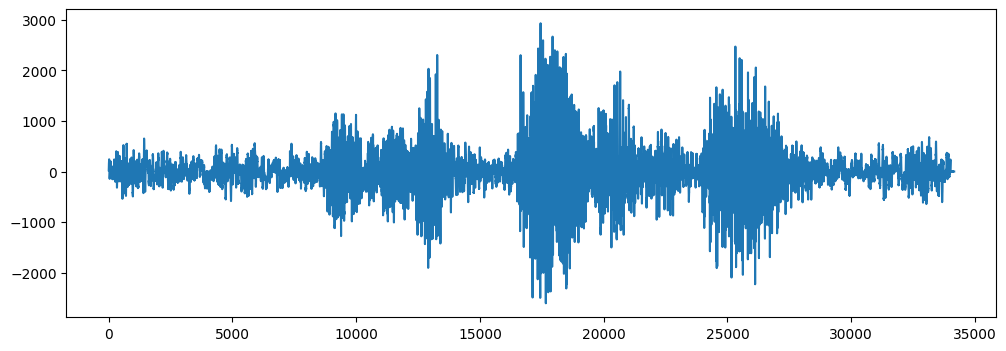

In [6]:
### Lets read with scipy
mono_wave_sr, mono_wave_audio = wav.read('original_audio_data/' + mono_files[0]) 

# Original audio with 1 channels 
plt.figure(figsize=(12, 4))
plt.plot(mono_wave_audio)

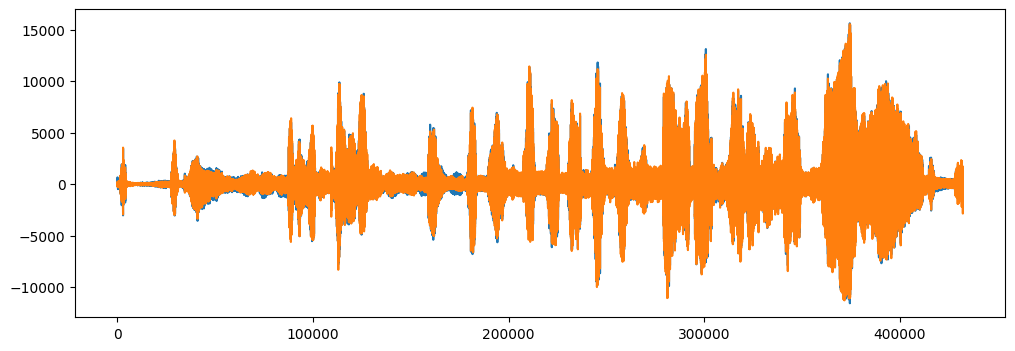

In [7]:
stereo_wave_sr, stereo_wave_audio = wav.read('original_audio_data/' + stereo_files[0]) 

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(stereo_wave_audio)

## Noise Reduction

In [8]:
sample_data_denoised = nr.reduce_noise(y=sample_data, sr=sample_sample_rate)

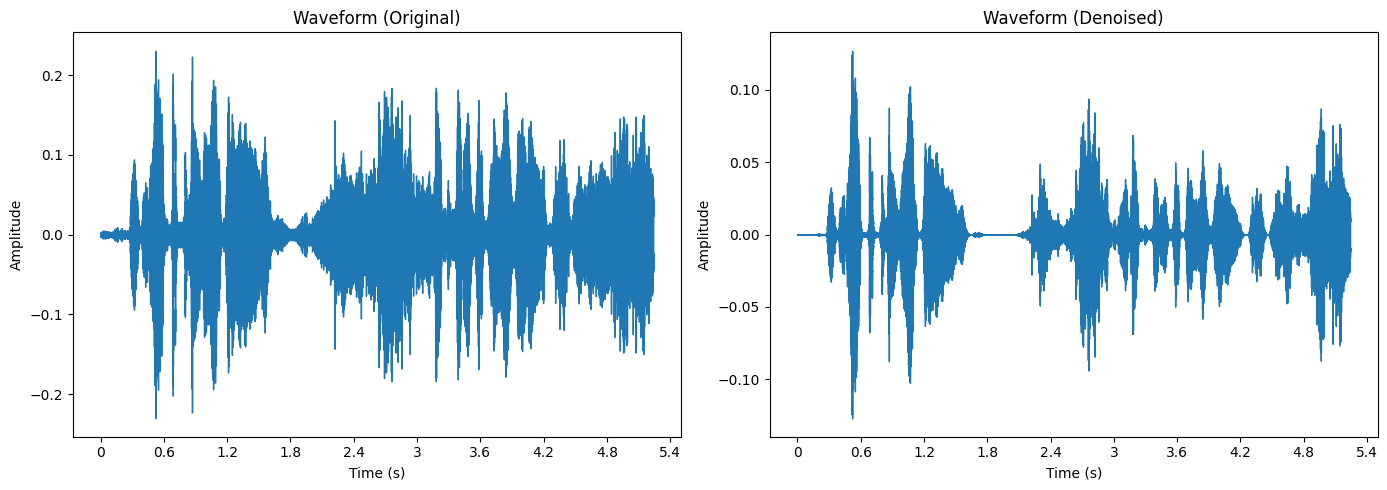

Original Audio:


Denoised Audio:


In [9]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd

# Assuming 'sample_file_denoised' and 'data' are already loaded, and 'sample_rate' is defined

plt.figure(figsize=(14, 5))

# Plot the original waveform
plt.subplot(1, 2, 1)
librosa.display.waveshow(sample_data, sr=sample_sample_rate)
plt.title('Waveform (Original)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the denoised waveform
plt.subplot(1, 2, 2)
librosa.display.waveshow(sample_data_denoised, sr=sample_sample_rate)
plt.title('Waveform (Denoised)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Play both audio files
print("Original Audio:")
ipd.display(ipd.Audio(sample_data, rate=sample_sample_rate))  # Play original audio

print("Denoised Audio:")
ipd.display(ipd.Audio(sample_data_denoised, rate=sample_sample_rate))  # Play denoised audio

In [10]:


# Define input and output folders
input_folder = 'original_audio_data'  # Replace with your actual input folder path
output_folder = 'reduced_audio_data'  # Replace with your actual output folder path

# Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

# Process each .wav file in the input folder
for file_name in os.listdir(input_folder):
    if file_name.endswith('.wav'):
        input_path = os.path.join(input_folder, file_name)
        output_path = os.path.join(output_folder, file_name)

        try:
            # Load audio file
            data, sample_rate = librosa.load(input_path, sr=None)

            # Apply noise reduction
            reduced_noise = nr.reduce_noise(y=data, sr=sample_rate)

            # Save the noise-reduced audio
            sf.write(output_path, reduced_noise, sample_rate)

            print(f"Processed and saved: {output_path}")
        except Exception as e:
            print(f"Error processing {file_name}: {e}")

Processed and saved: reduced_audio_data/249.wav
Processed and saved: reduced_audio_data/275.wav
Processed and saved: reduced_audio_data/261.wav
Processed and saved: reduced_audio_data/16.wav
Processed and saved: reduced_audio_data/103.wav
Processed and saved: reduced_audio_data/117.wav
Processed and saved: reduced_audio_data/329.wav
Processed and saved: reduced_audio_data/301.wav
Processed and saved: reduced_audio_data/315.wav
Processed and saved: reduced_audio_data/314.wav
Processed and saved: reduced_audio_data/300.wav
Processed and saved: reduced_audio_data/328.wav
Processed and saved: reduced_audio_data/116.wav
Processed and saved: reduced_audio_data/102.wav
Processed and saved: reduced_audio_data/17.wav
Processed and saved: reduced_audio_data/260.wav
Processed and saved: reduced_audio_data/274.wav
Processed and saved: reduced_audio_data/248.wav
Processed and saved: reduced_audio_data/289.wav
Processed and saved: reduced_audio_data/262.wav
Processed and saved: reduced_audio_data/27

In [11]:
def extract_audio_features(file_path):
    """
    Extracts audio features from a given audio file.
    
    Parameters:
    - file_path (str): Path to the audio file.
    
    Returns:
    - features (dict): A dictionary containing the waveform, spectrogram, MFCCs, and chroma features.
    """
    y, sr = librosa.load(file_path, sr=None)

    # Extract waveform
    waveform = y

    # Compute spectrogram
    stft = librosa.stft(y)
    spectrogram = np.abs(stft)

    # Compute MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    # Compute chroma features
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)

    return {
        'waveform': waveform,
        'sample_rate': sr,
        'spectrogram': spectrogram,
        'mfccs': mfccs,
        'chroma': chroma
    }

In [12]:
def plot_audio_features(features):
    """
    Plots the waveform, spectrogram, MFCCs, and chroma features.

    Parameters:
    - features (dict): A dictionary containing the audio features.
    """
    waveform = features['waveform']
    sr = features['sample_rate']
    spectrogram = features['spectrogram']
    mfccs = features['mfccs']
    chroma = features['chroma']

    plt.figure(figsize=(16, 12))

    # Plot waveform
    plt.subplot(2, 2, 1)
    librosa.display.waveshow(waveform, sr=sr)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # Plot spectrogram
    plt.subplot(2, 2, 2)
    librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), sr=sr, x_axis='time', y_axis='log', cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

    # Plot MFCCs
    plt.subplot(2, 2, 3)
    librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap='coolwarm')
    plt.colorbar()
    plt.title('MFCCs')
    plt.xlabel('Time (s)')
    plt.ylabel('MFCC Coefficients')

    # Plot chroma features
    plt.subplot(2, 2, 4)
    librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
    plt.colorbar()
    plt.title('Chroma Features')
    plt.xlabel('Time (s)')
    plt.ylabel('Pitch Class')

    plt.tight_layout()
    plt.show()


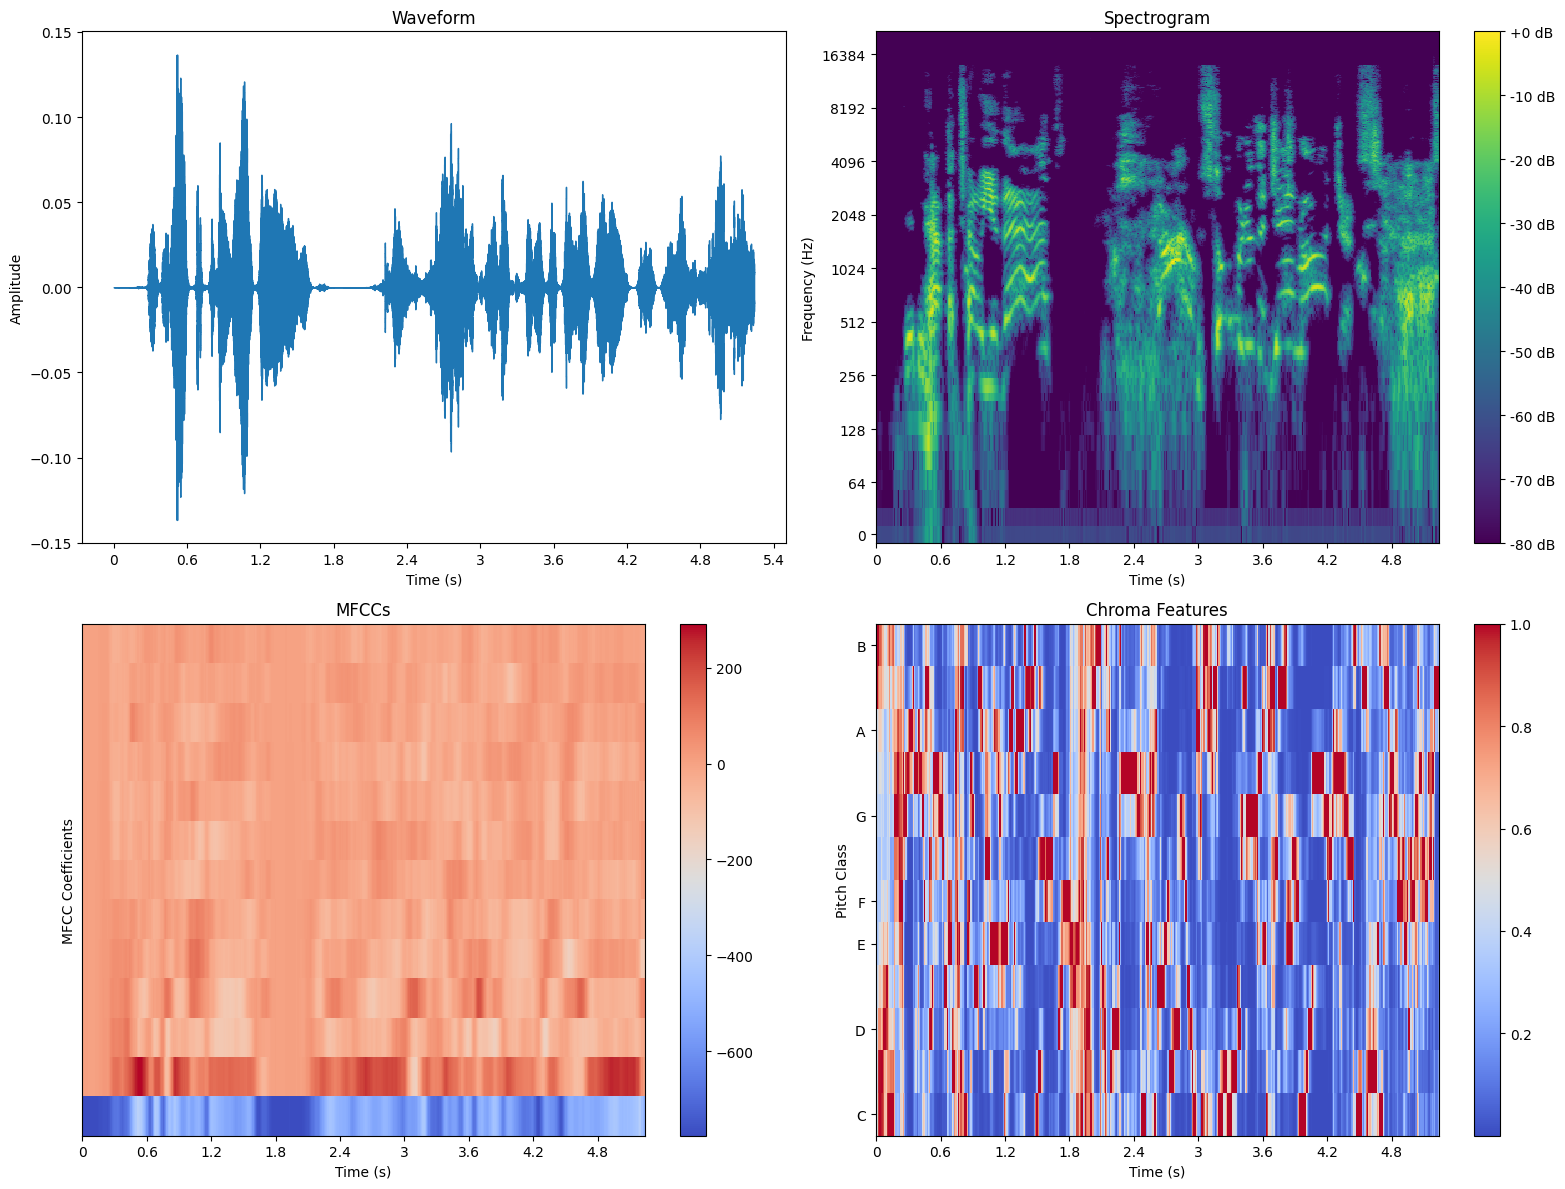

In [13]:
# sample feature
file_path = 'reduced_audio_data/1.wav'
audio_features = extract_audio_features(file_path)
plot_audio_features(audio_features)

In [14]:
def extract_full_audio_features(file_path):
    """
    Extract various audio features from a given audio file, including duration.
    
    Parameters:
    - file_path (str): Path to the audio file.
    
    Returns:
    - dict: Dictionary containing audio features.
    """
    try:
        # Load audio file
        y, sr = librosa.load(file_path, sr=None)
        
        # Extract features
        duration = librosa.get_duration(y=y, sr=sr)
        mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)
        spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
        spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
        pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
        pitch = np.mean(pitches[pitches > 0]) if pitches.any() else 0
        energy = np.sum(y**2) / len(y)
        loudness = librosa.feature.rms(y=y).mean()

        return {
            'duration': duration,
            'mfccs': mfccs.tolist(),
            'spectral_centroid': spectral_centroid,
            'spectral_bandwidth': spectral_bandwidth,
            'pitch': pitch,
            'energy': energy,
            'loudness': loudness
        }
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return {
            'duration': np.nan,
            'mfccs': [np.nan] * 13,
            'spectral_centroid': np.nan,
            'spectral_bandwidth': np.nan,
            'pitch': np.nan,
            'energy': np.nan,
            'loudness': np.nan
        }

audio_folder = 'reduced_audio_data'  # Path to folder containing audio files

# Extract features for each audio file and store in DataFrame
feature_columns = ['duration', 'mfccs', 'spectral_centroid', 'spectral_bandwidth', 'pitch', 'energy', 'loudness']
audio_features_list = []

for _, row in df.iterrows():
    file_path = os.path.join(audio_folder, f"{row['id']}.wav")
    features = extract_full_audio_features(file_path)
    features_flat = {key: val if not isinstance(val, list) else val for key, val in features.items()}
    audio_features_list.append(features_flat)

# Merge features back to the DataFrame
features_df = pd.DataFrame(audio_features_list)

/Users/vivianzhao/anaconda3/envs/dsc80/lib/python3.8/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=384
  warnings.warn(
/Users/vivianzhao/anaconda3/envs/dsc80/lib/python3.8/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1152
  warnings.warn(


In [15]:
new_df = pd.concat([df, features_df], axis=1)

# Show the resulting DataFrame
new_df

,file_id,sarcasm,text,label,emotion,id,duration,mfccs,spectral_centroid,spectral_bandwidth,pitch,energy,loudness
0,12054,0,Didn't have to tell you that Somebody's a Jan...,0,anger,1,5.240000,"[-581.4388427734375, 103.19503021240234, -34.1...",3194.061155,2498.073258,1724.758789,0.000169,0.009737
1,108,0,already respects the bucket.,0,anger,2,1.399977,"[-519.671630859375, 99.21368408203125, -31.404...",3207.430827,2460.578687,1596.321533,0.000481,0.017747
2,5809,0,"I accept all those flaws, why can't you accep...",0,anger,3,3.320000,"[-604.3026733398438, 90.88034057617188, -34.52...",3189.165736,2348.431343,2021.348999,0.000165,0.009494
3,145,0,"This is my wife Nancy. Look, get out!",0,anger,4,3.860000,"[-593.0642700195312, 92.73889923095703, -22.86...",4078.493479,3491.345131,1616.683838,0.000181,0.008689
4,4227,0,Fine! Then you tell Roger because he was real...,0,anger,5,3.780000,"[-523.6166381835938, 77.15715789794922, -10.64...",3678.133007,2459.192276,1724.678101,0.001107,0.024616
...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,sar_sicily_23,0,What happened to my parlour?,0,surprise,425,2.200000,"[-495.8974609375, 105.85691833496094, -15.6306...",3144.974111,2841.541063,1395.852905,0.000807,0.021128
425,sar_sicily_46,0,What? My car! It's gone! But... but... but......,0,surprise,426,5.610667,"[-684.0684204101562, 48.05113220214844, -13.70...",5777.586640,4555.686200,1681.129272,0.000048,0.003806
426,evelyn_15,0,"Ugh, what's going on? I mean, what are you do...",0,surprise,427,10.752000,"[-690.7086181640625, 63.86827087402344, -7.107...",4286.795750,3675.188011,1928.205444,0.000047,0.004524
427,21635,0,how can you not know which one?,0,surprise,428,1.550000,"[-514.0931396484375, 126.76039123535156, -32.4...",2472.252426,2386.249516,1754.947632,0.000246,0.012379


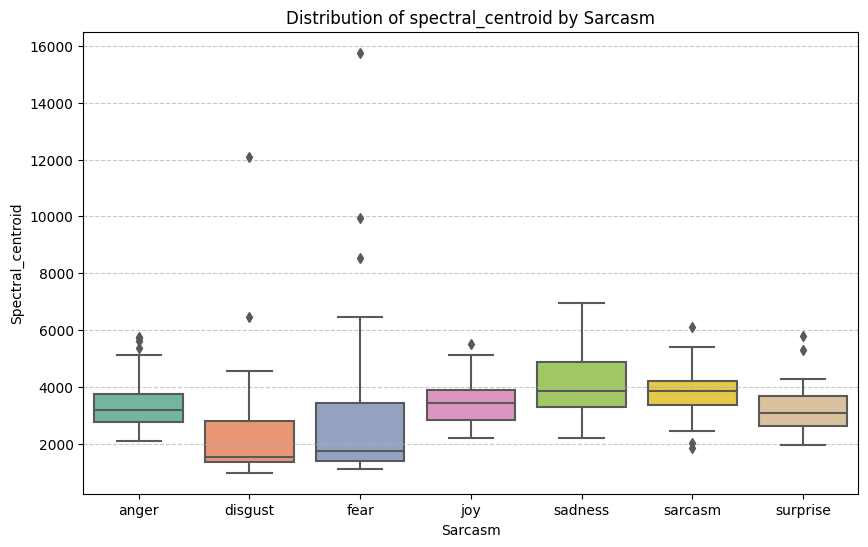

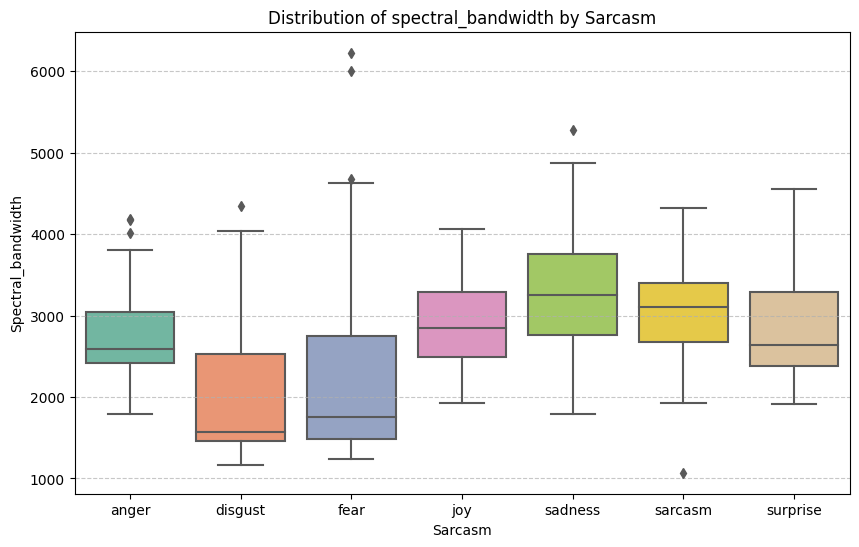

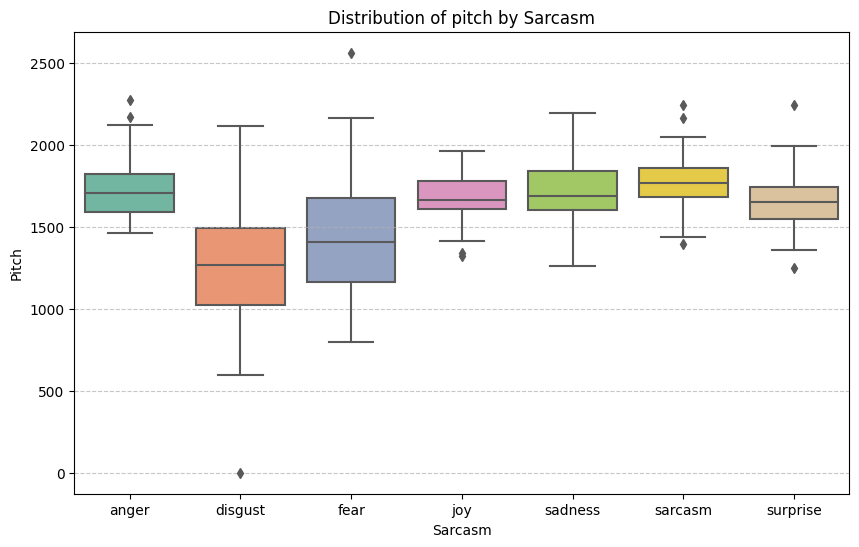

In [ ]:
columns_to_plot = ['spectral_centroid', 'spectral_bandwidth', 'pitch', 'energy', 'loudness']

# Plot box plots for each feature
for col in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=new_df, x='emotion', y=col, palette='Set2')
    plt.title(f'Distribution of {col} by Sarcasm')
    plt.xlabel('Sarcasm')
    plt.ylabel(col.capitalize())
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

/Users/vivianzhao/anaconda3/envs/dsc80/lib/python3.8/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=384
  warnings.warn(
/Users/vivianzhao/anaconda3/envs/dsc80/lib/python3.8/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/Users/vivianzhao/anaconda3/envs/dsc80/lib/python3.8/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1152
  warnings.warn(


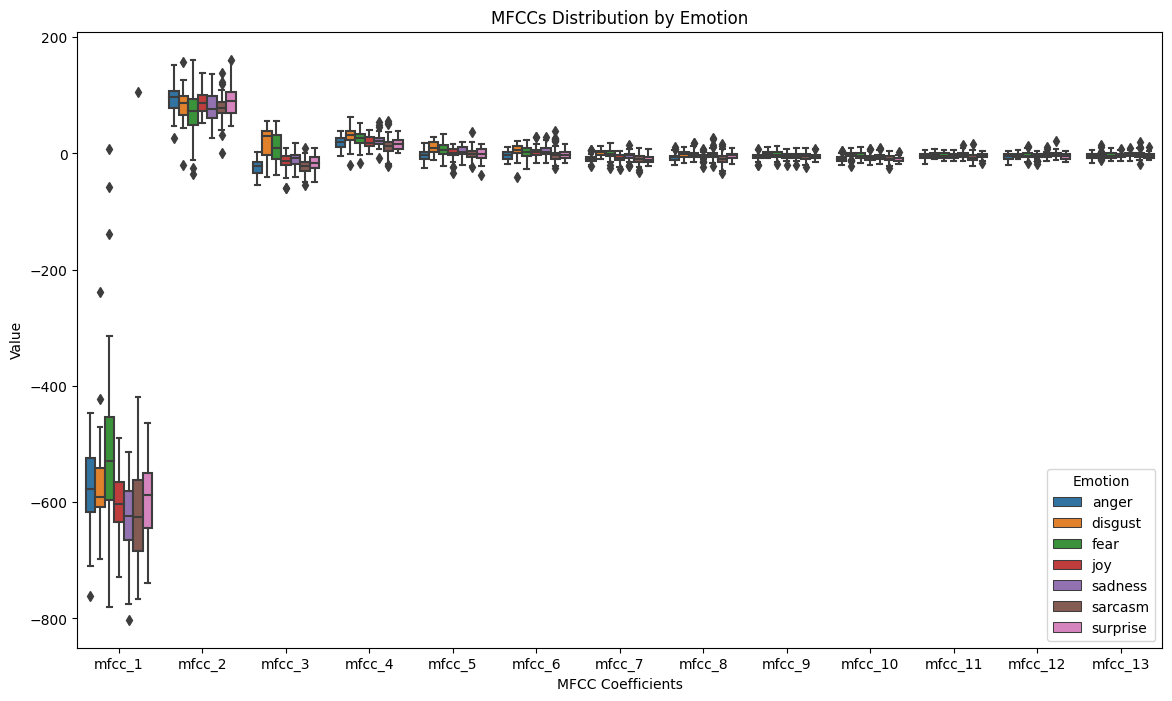

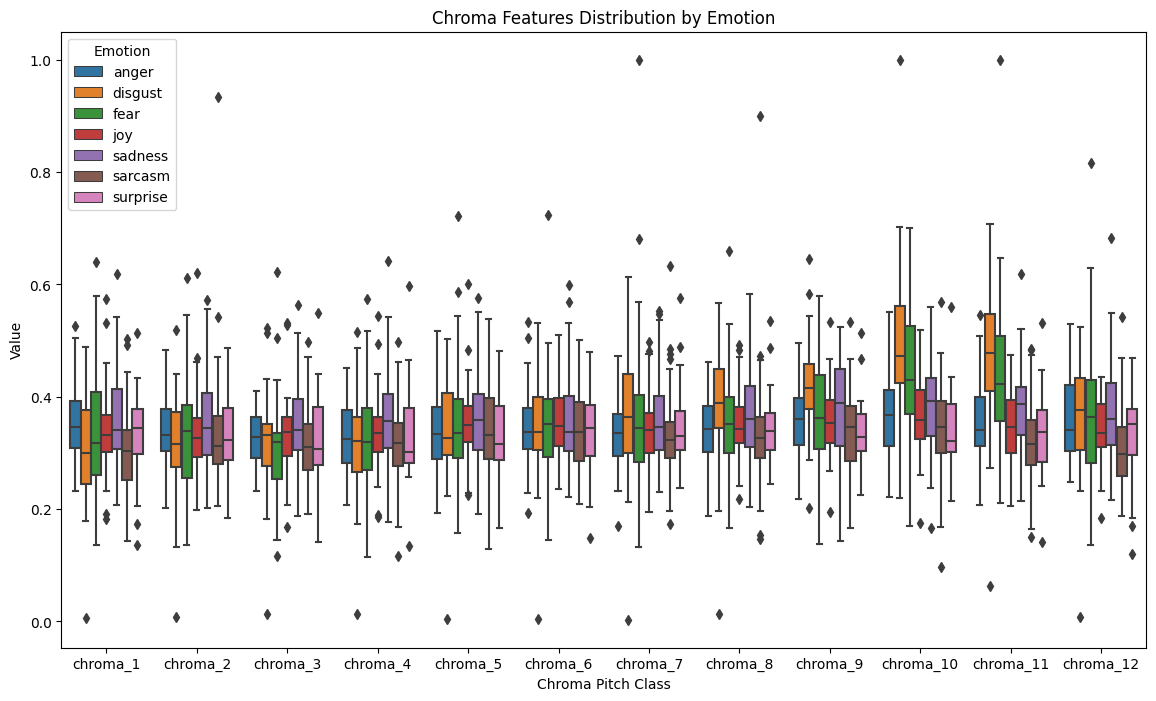

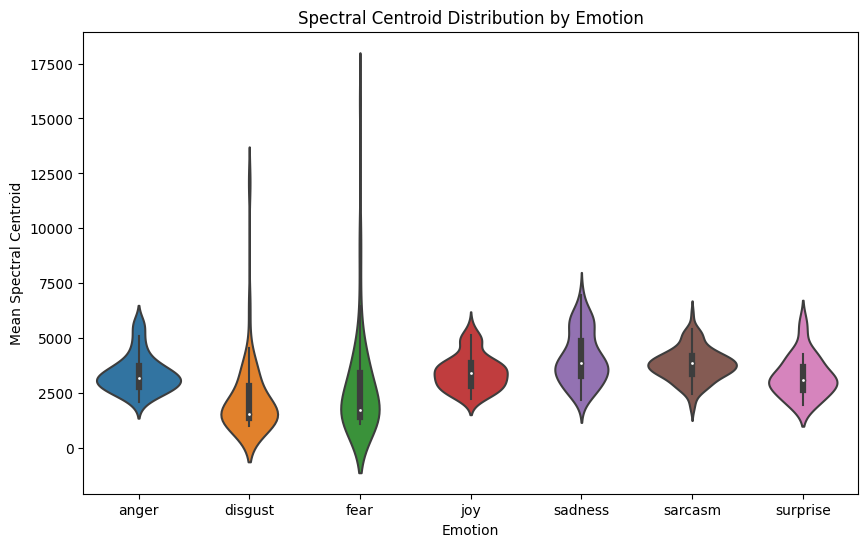

In [ ]:
def extract_mean_features(file_path):
    """
    Extract mean audio features from a given audio file for EDA.
    
    Returns a dictionary of mean features for statistical comparison.
    """
    y, sr = librosa.load(file_path, sr=None)
    
    # Compute features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)

    return {
        'mean_mfccs': np.mean(mfccs, axis=1),
        'mean_chroma': np.mean(chroma, axis=1),
        'mean_spectral_centroid': np.mean(spectral_centroid)
    }

# Initialize DataFrame to store features
eda_features = []

audio_folder = 'reduced_audio_data'  # Folder containing audio files

# Extract mean features for each emotion
for _, row in df.iterrows():
    file_path = os.path.join(audio_folder, f"{row['id']}.wav")
    if os.path.exists(file_path):
        features = extract_mean_features(file_path)
        eda_features.append({
            'emotion': row['emotion'],
            **{f'mfcc_{i+1}': mfcc for i, mfcc in enumerate(features['mean_mfccs'])},
            **{f'chroma_{i+1}': chroma for i, chroma in enumerate(features['mean_chroma'])},
            'spectral_centroid': features['mean_spectral_centroid']
        })

eda_df = pd.DataFrame(eda_features)

# Boxplot for MFCCs
plt.figure(figsize=(14, 8))
sns.boxplot(data=eda_df.melt(id_vars='emotion', value_vars=[f'mfcc_{i+1}' for i in range(13)]), 
            x='variable', y='value', hue='emotion')
plt.title('MFCCs Distribution by Emotion')
plt.xlabel('MFCC Coefficients')
plt.ylabel('Value')
plt.legend(title='Emotion')
plt.show()

# Boxplot for Chroma Features
plt.figure(figsize=(14, 8))
sns.boxplot(data=eda_df.melt(id_vars='emotion', value_vars=[f'chroma_{i+1}' for i in range(12)]), 
            x='variable', y='value', hue='emotion')
plt.title('Chroma Features Distribution by Emotion')
plt.xlabel('Chroma Pitch Class')
plt.ylabel('Value')
plt.legend(title='Emotion')
plt.show()

# Violin Plot for Spectral Centroid
plt.figure(figsize=(10, 6))
sns.violinplot(data=eda_df, x='emotion', y='spectral_centroid')
plt.title('Spectral Centroid Distribution by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Mean Spectral Centroid')
plt.show()

# Text Feature Extraction